In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the Iris dataset (assumes CSV is already in the working directory)
df = pd.read_csv('Iris.csv')

# Display the first few rows of the dataset
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Display column names and data types
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [12]:
# -------------------------------
# 1. List features and their types
# -------------------------------
iris = pd.read_csv('Iris.csv')

print("1. Features and Their Types:\n")

# Print data types of all columns
print(iris.dtypes)

# Manually classify as Numeric or Nominal
print("\nFeature Summary:")
for col in iris.columns:
    dtype = iris[col].dtype
    if dtype == 'float64' or dtype == 'int64':
        print(f"- {col}: Numeric")
    else:
        print(f"- {col}: Nominal")

1. Features and Their Types:

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

Feature Summary:
- sepal.length: Numeric
- sepal.width: Numeric
- petal.length: Numeric
- petal.width: Numeric
- variety: Nominal


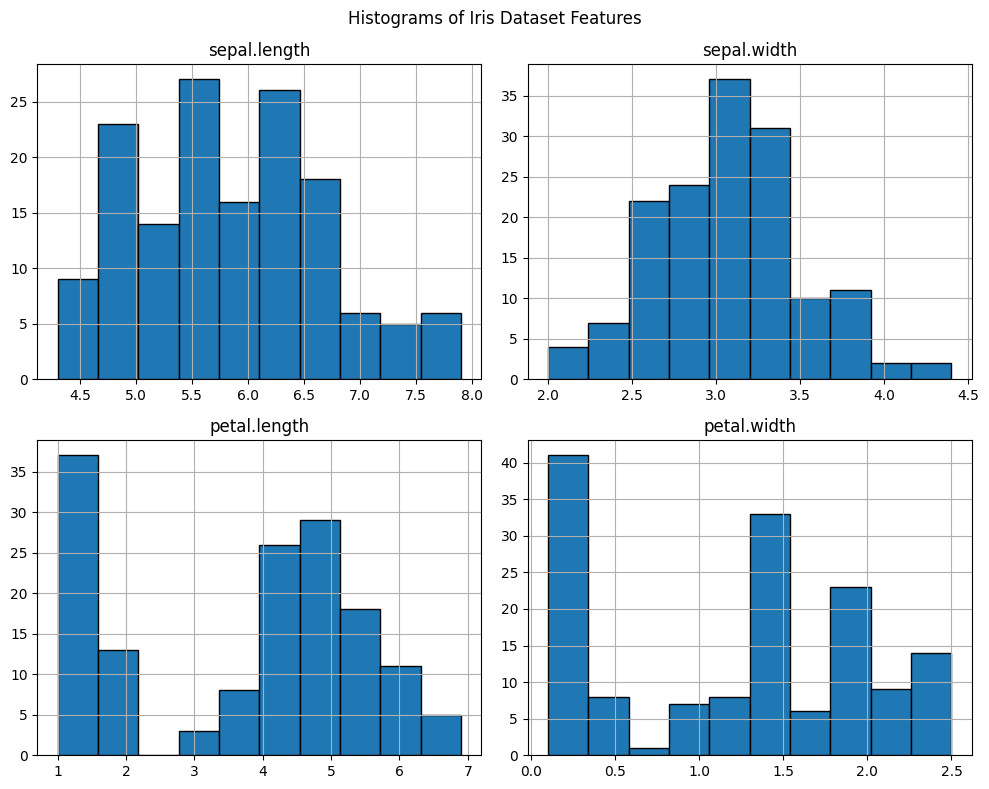

In [13]:
# Plot histograms for each numeric feature to show distributions
df.hist(edgecolor='black', figsize=(10, 8))
plt.suptitle('Histograms of Iris Dataset Features')
plt.tight_layout()
plt.show()


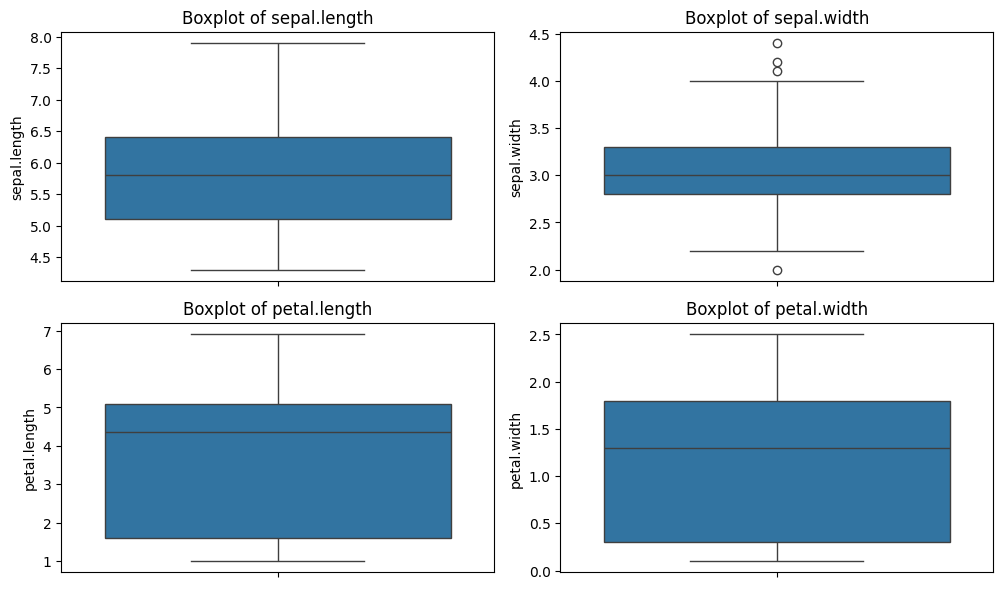

In [14]:
# Create boxplots to visualize the spread and potential outliers
plt.figure(figsize=(10, 6))
for i, column in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [15]:
# Summary statistics to help identify potential outliers
df.describe()


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# -------------------------------
# 4. Compare distributions & outliers
# -------------------------------

print("4. Distribution Comparison & Outliers:")

# Loop through all numeric columns
for column in iris.select_dtypes(include=['float64', 'int64']).columns:
    desc = iris[column].describe()
    print(f"\nFeature: {column}")
    print(desc)

    # Calculate IQR
    q1 = iris[column].quantile(0.25)
    q3 = iris[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find outliers
    outliers = iris[(iris[column] < lower_bound) | (iris[column] > upper_bound)]
    print(f"Potential outliers in {column}: {len(outliers)}")

    # Display outlier rows
    if not outliers.empty:
        print(outliers[['variety', column]])  # 🔁 changed from 'species' to 'variety'
    else:
        print("No outliers found.")


4. Distribution Comparison & Outliers:

Feature: sepal.length
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal.length, dtype: float64
Potential outliers in sepal.length: 0
No outliers found.

Feature: sepal.width
count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal.width, dtype: float64
Potential outliers in sepal.width: 4
       variety  sepal.width
15      Setosa          4.4
32      Setosa          4.1
33      Setosa          4.2
60  Versicolor          2.0

Feature: petal.length
count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal.length, dtype: float64
Potential outliers in petal.length: 0
No outliers found.

Feature: petal.wi